# Проект Приоритизация гипотез и Анализ A/B-теста.

**Часть 1. Приоритизация гипотез.**

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло

**Часть 2. Анализ A/B-теста**

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача**

Проанализируйте A/B-тест:

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

14. Примите решение по результатам теста и объясните его.

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Описание данных**

**Данные для первой части**

Файл /datasets/hypothesis.csv. 

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


**Данные для второй части**


Файл /datasets/orders.csv.

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Часть 1. Приоритизация гипотез.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math as mth

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')

In [4]:
pd.set_option('max_colwidth', 120)

In [5]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [6]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [7]:
ice = hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
ice

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [8]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [9]:
rice = hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)
rice

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


In [10]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20


Как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло

Для оценки приоритизации гипотиз использовали два фрейма ICE и RICE.

Приоритизация гипотиз изменилась по оценке RICE первое место заняла 7-я теория в отличие от расчета ICE, где первое место заняла гипотиза 8. Поднобные изменения произошли потому что использовался различный метод оценки RICE в отличии от ICE учитывает Охват (Reach)

Система приоритизации гипотиз RICE включает в расчет параметр охвата, который показывает по принятой шкале в компании кокого клиентов коснется изменение. как мы можем видеть учет охвата сильно изменяет приоритет гипотиз при прочих равных гипотиз  

# Часть 2. Анализ A/B-теста

In [11]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [15]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [18]:
#Приведем колонки с датами к формату данных datetime
orders['date'] = pd.to_datetime(orders['date'])

In [19]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [20]:
# посмотрим сколько у нас групп в АВ-тесте
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [21]:
#даты начала и окончания теста
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [22]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [23]:
#сколько пользователей в каждой группе - по таблице с заказами
orders.groupby('group').agg({'visitorId':'nunique'})

,visitorId
group,
A,503
B,586


In [24]:
#не попадают ли какие-то пользователи в обе группы - по таблице с заказами
s1 = orders.query("group == 'A'")['visitorId']

In [25]:
s2 = orders.query("group == 'B'")['visitorId']

In [26]:
pd.Series(np.intersect1d(pd.Series(s1), pd.Series(s2)))

0        8300375
1      199603092
2      232979603
3      237748145
4      276558944
5      351125977
6      393266494
7      457167155
8      471551937
9      477780734
10     818047933
11     963407295
12    1230306981
13    1294878855
14    1316129916
15    1333886533
16    1404934699
17    1602967004
18    1614305549
19    1648269707
20    1668030113
21    1738359350
22    1801183820
23    1959144690
24    2038680547
25    2044997962
26    2378935119
27    2458001652
28    2579882178
29    2587333274
30    2600415354
31    2654030115
32    2686716486
33    2712142231
34    2716752286
35    2780786433
36    2927087541
37    2949041841
38    2954449915
39    3062433592
40    3202540741
41    3234906277
42    3656415546
43    3717692402
44    3766097110
45    3803269165
46    3891541246
47    3941795274
48    3951559397
49    3957174400
50    3963646447
51    3972127743
52    3984495233
53    4069496402
54    4120364173
55    4186807279
56    4256040402
57    4266935830
dtype: int64

Получается 58 пользователей попали в обе группы

## 1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [27]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Соберём агрегированные кумулятивные по дням данные о заказах

In [28]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1) \
.sort_values(by=['date','group'])


Получим агрегированные кумулятивные по дням данные о посетителях 

In [29]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [30]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [31]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


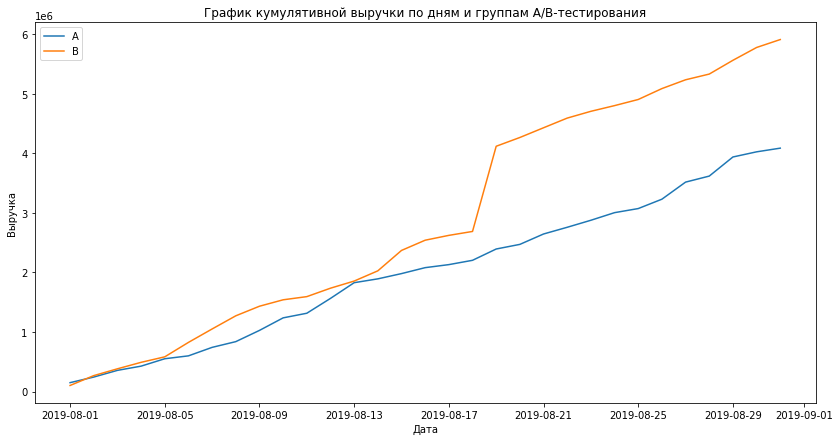

In [32]:
plt.figure(figsize=(14, 7))
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по дням и группам A/B-тестирования')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend();

Выручка почти равномерно увеличивается в течение всего теста, в группе B виден резкий скачек, возможно наличие однократных крупных покупок

## 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

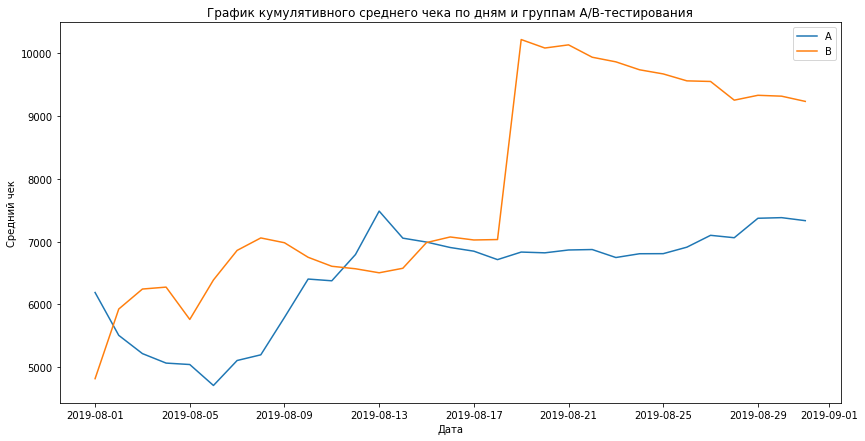

In [33]:
plt.figure(figsize=(14, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по дням и группам A/B-тестирования')
plt.legend();

В среднем чеке мы также видим наличие выбросов в виде резкого скачка графика В,к концу теста графики становятся более равномерными

## 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

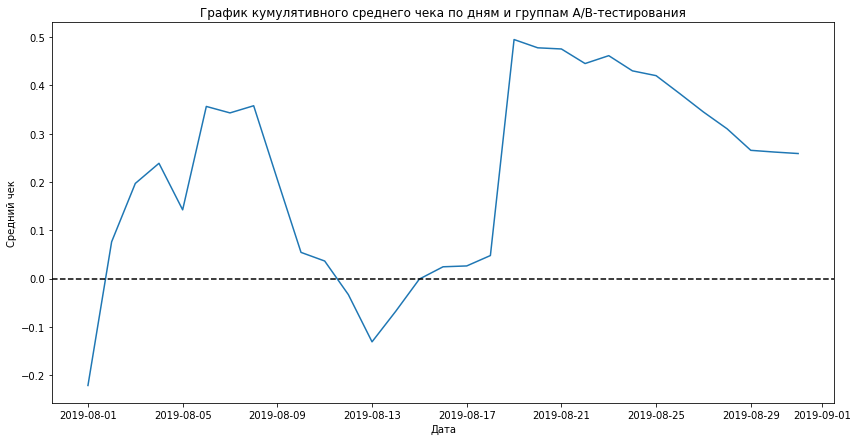

In [34]:
plt.figure(figsize=(14, 7))
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по дням и группам A/B-тестирования')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') ;

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы

## 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

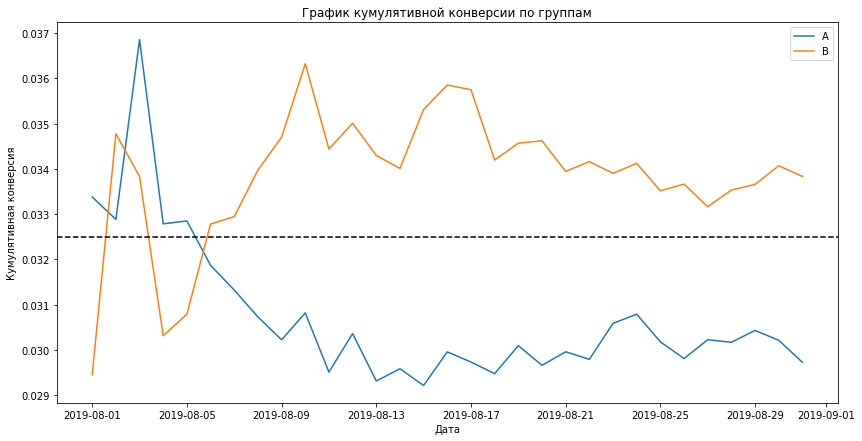

In [35]:
plt.figure(figsize=(14, 7))
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.title('График кумулятивной конверсии по группам')
plt.axhline(y=0.0325, color='black', linestyle='--');

Графики получились почти симетричными. Группы колебались около одного значения, но затем конверсия группы A немного начала снижаться, а конверсия группы B немного просела и примерно осталась на одном уровне.

## 5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.

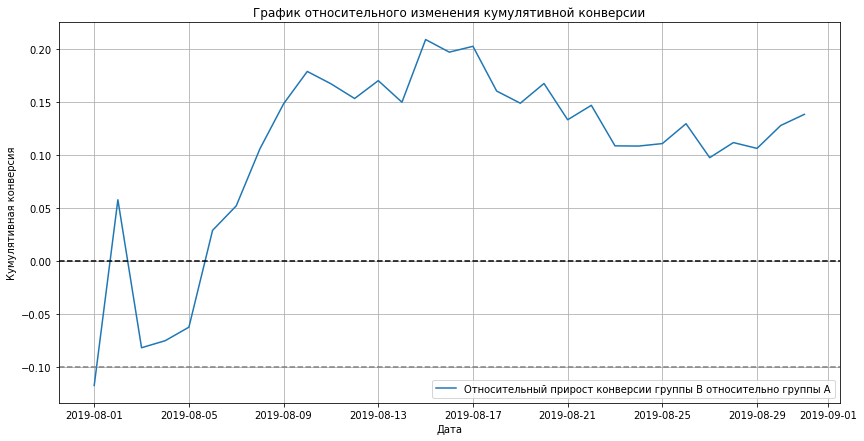

In [36]:
plt.figure(figsize=(14, 7))
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.title('График относительного изменения кумулятивной конверсии');

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но в конце постепенно растёт.

## 6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [37]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})

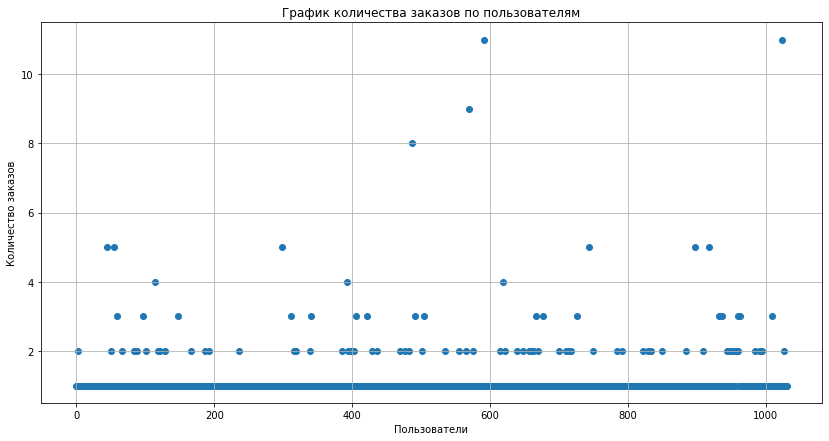

In [38]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(14,7))
plt.scatter(x_values, ordersByUsers['transactionId']) 
plt.grid()
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title('График количества заказов по пользователям');

На графике мы видим, что в основном делают до 4 заказов

## 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [39]:
np.percentile(orders['transactionId'], [95, 99])

array([4.06747146e+09, 4.23914816e+09])

Примем за аномальных пользователей тех, кто совершил от 4 заказов, так мы уберем 5% пользователей с наибольшим числом заказов

## 8. Построим точечный график стоимости заказов. Сделаем выводы и предположения.

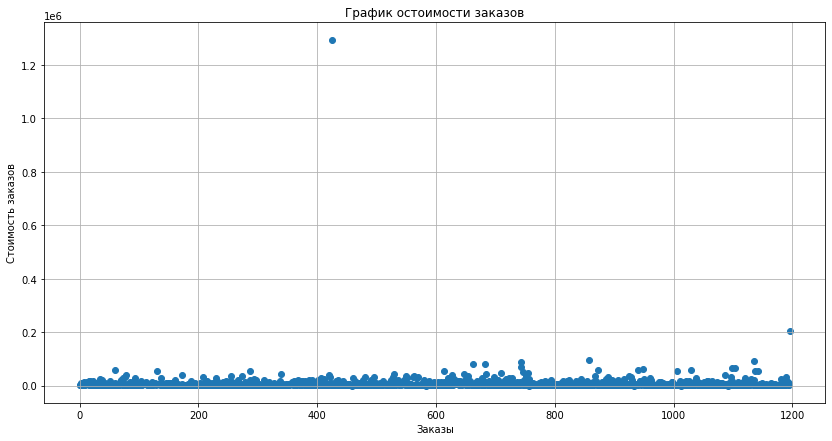

In [40]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(14,7))
plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.title('График остоимости заказов');

По графику можно сказать, что большенство заказов лежит в пределах стоимости д 20000

## 9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберим границу для определения аномальных заказов.

In [41]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Примем за аномальных пользователей тех, кто совершил заказ дороже 28000, так мы уберем 5% пользователей с дорогими заказами

## 10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

In [42]:
df = orders.groupby('group', as_index=False).agg({'transactionId':'count'})

In [43]:
df1 = visitors.groupby('group', as_index=False).agg({'visitors':'sum'})

In [44]:
conversion = df.merge(df1, on='group', how='left')
conversion['conversion'] = conversion['transactionId'] / conversion['visitors']
conversion

,group,transactionId,visitors,conversion
0,A,557,18736,0.03
1,B,640,18916,0.03


Воспользуемся Z-критерием для разности двух долей.

H0: Конверсия в группе A РАВНА конверсии в группе B

H1: Конверсия в группе A НЕ РАВНА конверсии в группе B

In [45]:
# критический уровень статистической значимости
alpha = 0.05

In [46]:
successes = np.array(conversion['transactionId'])
trials = np.array(conversion['visitors'])

In [47]:
# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

In [48]:
# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

In [49]:
# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [50]:
# разница пропорций в датасетах
difference = p1 - p2

In [51]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [52]:
# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

In [53]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [54]:
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [55]:
conversion['conversion_%'] = conversion['conversion'] * 100
conversion

,group,transactionId,visitors,conversion,conversion_%
0,A,557,18736,0.03,2.97
1,B,640,18916,0.03,3.38


In [56]:
#разницa в конверсии между группами.
conversion.loc[1,'conversion_%'] - conversion.loc[0,'conversion_%']

0.410492728064332

**Конверсия B больше на 0,41%, стат.значимость есть.**

## 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Воспользуемся критерием Манна-Уитни
 
H0: Средний чек A НЕ ПРЕВОСХОДИТ среднему чеку группы B

H1: Средний чек A ПРЕВОСХОДИТ среднему чеку группы B

In [57]:
# критический уровень статистической значимости
alpha = 0.05

In [58]:
sales_a = np.array(orders.query("group == 'A'")['revenue'])

In [59]:
sales_b = np.array(orders.query("group == 'B'")['revenue'])

In [60]:
results = st.mannwhitneyu(sales_a, sales_b, True, 'less')

In [61]:
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else: print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.3646454927716229
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Сделать вывод, что в вгруппе пользователи стали платить больше или меньше, — нельзя.

In [62]:
rev_a = orders.query("group == 'A'")['revenue'].mean()
rev_a

7333.578096947936

In [63]:
rev_b = orders.query("group == 'B'")['revenue'].mean()
rev_b

9230.875

In [64]:
#Найдем процентную разницу в среднем чеке между группами
(rev_b - rev_a )/ rev_a * 100

25.871366991260043

**Средний чек в группе А не превосходит средний чек в группе В**

## 12.Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сьделаем выводы и предположения.

Воспользуемся Z-критерием для разности двух долей.

H0: Конверсия в группе A РАВНА конверсии в группе B

H1: Конверсия в группе A НЕ РАВНА конверсии в группе B

In [65]:
#Очистим данные в соответствии с ранее принятыми критериями количество покупок не более 4, сумма покупок не более 28000
orders_clear = orders.groupby(['visitorId'], as_index=False).agg({'transactionId':'count', 'revenue':'sum'}) \
.query("transactionId < 4 and revenue < 28000") \
.drop(columns=['transactionId', 'revenue']) \
.merge(orders, on='visitorId', how='inner')
orders_clear.head()

,visitorId,transactionId,date,revenue,group
0,5114589,900025958,2019-08-16,570,B
1,6958315,1887336629,2019-08-04,1490,B
2,8300375,3679129301,2019-08-01,10510,B
3,8300375,4293855558,2019-08-07,1790,A
4,11685486,797272237,2019-08-23,6201,A


In [66]:
conversion_clear = orders_clear.groupby('group', as_index=False).agg({'transactionId':'count'}) \
.merge(df1, on='group', how='left')
conversion_clear['conversion'] = conversion_clear['transactionId'] / conversion_clear['visitors']
conversion_clear

,group,transactionId,visitors,conversion
0,A,470,18736,0.03
1,B,555,18916,0.03


In [67]:
conversion_clear['conversion_%'] = conversion_clear['conversion']*100

In [68]:
conversion_clear

,group,transactionId,visitors,conversion,conversion_%
0,A,470,18736,0.03,2.51
1,B,555,18916,0.03,2.93


In [69]:
# критический уровень статистической значимости
alpha = 0.05

In [70]:
successes = np.array(conversion_clear['transactionId'])
trials = np.array(conversion_clear['visitors'])

In [71]:
# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

In [72]:
# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

In [73]:
# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

In [74]:
# разница пропорций в датасетах
difference = p1 - p2

In [75]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

In [76]:
# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

In [77]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

In [78]:
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

p-значение:  0.011190459653751983
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [79]:
#разницa в конверсии между группами.
conversion_clear.loc[1,'conversion_%'] - conversion_clear.loc[0,'conversion_%']

0.4254843969265716

**По очищенным данным конверсия B больше на 0,42%, стат.значимость есть.**

## 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [80]:
orders_clear.head()

,visitorId,transactionId,date,revenue,group
0,5114589,900025958,2019-08-16,570,B
1,6958315,1887336629,2019-08-04,1490,B
2,8300375,3679129301,2019-08-01,10510,B
3,8300375,4293855558,2019-08-07,1790,A
4,11685486,797272237,2019-08-23,6201,A


In [81]:
# критический уровень статистической значимости
alpha = 0.05

In [82]:
sales_a = np.array(orders_clear.query("group == 'A'")['revenue'])

In [83]:
sales_b = np.array(orders_clear.query("group == 'B'")['revenue'])

In [84]:
results = st.mannwhitneyu(sales_a, sales_b, True, 'less')

In [85]:
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else: print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.44108228208168165
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [86]:
rev_a = orders_clear.query("group == 'A'")['revenue'].mean()
rev_a

4829.536170212766

In [87]:
rev_b = orders_clear.query("group == 'B'")['revenue'].mean()
rev_b

4925.645045045045

In [88]:
#Найдем процентную разницу в среднем чеке между группами
(rev_b - rev_a )/ rev_a * 100

1.9900228809766836

# Выводы

Примите решение по результатам теста и объясните его.

1. Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.

2. По сырым данным есть статистически значимое различие по среднему чеку между группами и после удаления аномалий статистически значимое различие есть.

3. График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту

**По результатам тест можно остановить и признать его удачным**